<a href="https://colab.research.google.com/github/artem-dorofeev/py_DataScience_HW/blob/main/hw06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.




Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

*df_2d - двовимірний датасет,
df_mnist - датасет mnist.
завантажуємо*

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df_2d = pd.read_csv('/content/data_01/data_2d.csv')
df_mnist = pd.read_csv('/content/data_01/mnist.csv')
# df_2d
# df_2d.info()


In [2]:
df_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


from matplotlib import pyplot as plt
df_2d['0.000000000000000000e+00'].plot(kind='hist', bins=20, title='0.000000000000000000e+00')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2d['-7.687164597386728637e-01'].plot(kind='hist', bins=20, title='-7.687164597386728637e-01')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2d['4.608603078297135447e-01'].plot(kind='hist', bins=20, title='4.608603078297135447e-01')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2d.plot(kind='scatter', x='0.000000000000000000e+00', y='-7.687164597386728637e-01', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2d.plot(kind='scatter', x='-7.687164597386728637e-01', y='4.608603078297135447e-01', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['0.000000000000000000e+00']
  ys = series['-7.687164597386728637e-01']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2d.sort_values('0.000000000000000000e+00', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0.000000000000000000e+00')
_ = plt.ylabel('-7.687164597386728637e-01')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['0.000000000000000000e+00']
  ys = series['4.608603078297135447e-01']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2d.sort_values('0.000000000000000000e+00', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0.000000000000000000e+00')
_ = plt.ylabel('4.608603078297135447e-01')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['0.000000000000000000e+00']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '0.000000000000000000e+00'}, axis=1)
              .sort_values('0.000000000000000000e+00', ascending=True))
  xs = counted['0.000000000000000000e+00']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2d.sort_values('0.000000000000000000e+00', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0.000000000000000000e+00')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_2d['0.000000000000000000e+00'].plot(kind='line', figsize=(8, 4), title='0.000000000000000000e+00')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_2d['-7.687164597386728637e-01'].plot(kind='line', figsize=(8, 4), title='-7.687164597386728637e-01')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_2d['4.608603078297135447e-01'].plot(kind='line', figsize=(8, 4), title='4.608603078297135447e-01')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
df_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
df_mnist['7'].plot(kind='hist', bins=20, title='7')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mnist['0.37'].plot(kind='hist', bins=20, title='0.37')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mnist['0.38'].plot(kind='hist', bins=20, title='0.38')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mnist['0.39'].plot(kind='hist', bins=20, title='0.39')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mnist.plot(kind='scatter', x='7', y='0.37', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mnist.plot(kind='scatter', x='0.37', y='0.38', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mnist.plot(kind='scatter', x='0.38', y='0.39', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mnist.plot(kind='scatter', x='0.39', y='0.65', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['0']
  ys = series['7']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_mnist.sort_values('0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0')
_ = plt.ylabel('7')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['0']
  ys = series['0.37']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_mnist.sort_values('0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0')
_ = plt.ylabel('0.37')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['0']
  ys = series['0.38']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_mnist.sort_values('0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0')
_ = plt.ylabel('0.38')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['0']
  ys = series['0.39']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_mnist.sort_values('0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('0')
_ = plt.ylabel('0.39')

from matplotlib import pyplot as plt
df_mnist['7'].plot(kind='line', figsize=(8, 4), title='7')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_mnist['0.37'].plot(kind='line', figsize=(8, 4), title='0.37')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_mnist['0.38'].plot(kind='line', figsize=(8, 4), title='0.38')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_mnist['0.39'].plot(kind='line', figsize=(8, 4), title='0.39')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

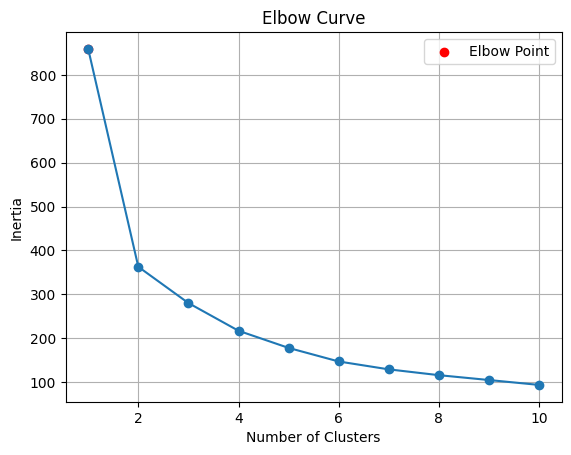

In [4]:
# будуємо ліктеву криву та визначаємо луктеву точку
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d)
    inertia_values.append(kmeans.inertia_)

elbow_point_df_2d = inertia_values.index(max(inertia_values)) + 1

plt.scatter(elbow_point_df_2d, inertia_values[elbow_point_df_2d - 1], c='red', label='Elbow Point')
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.legend()
plt.grid(True)
plt.show()

Elbow Point (DF 2d): 2


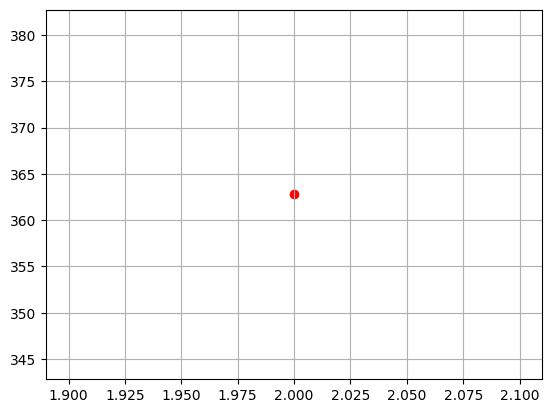

In [5]:
print("Elbow Point (DF 2d):", elbow_point_df_2d + 1)
plt.scatter(elbow_point_df_2d + 1, inertia_values[elbow_point_df_2d], c='red', label='Elbow Point')
plt.grid(True)


In [6]:
df_2d_2clusters = df_2d.copy()

final_kmeans = KMeans(n_clusters=elbow_point_df_2d + 1, random_state=42)
df_2d_2clusters['Cluster'] = final_kmeans.fit_predict(df_2d_2clusters.iloc[:, :-1])

df_2d_2clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01,Cluster
0,0.0,2.687848,2.366961,1
1,0.0,-0.201379,0.470430,0
2,0.0,0.608496,1.225400,0
3,0.0,-0.082282,1.137218,0
4,0.0,2.083069,2.694482,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


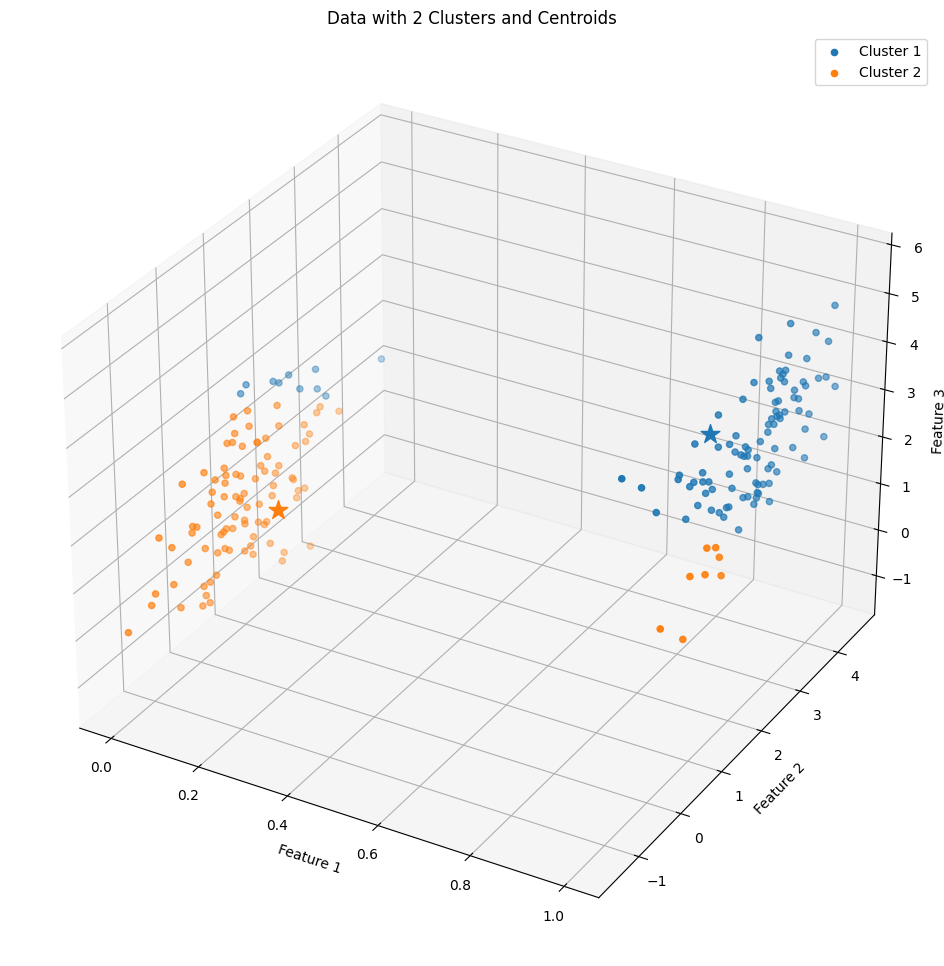

In [7]:
number_of_clusters = 2
initialization = 'k-means++'

kmeans = KMeans(n_clusters=number_of_clusters, init=initialization, random_state=42)
kmeans.fit(df_2d_2clusters)

centroids = kmeans.cluster_centers_

colors = plt.cm.tab10(range(number_of_clusters))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(number_of_clusters):
    ax.scatter(df_2d_2clusters[kmeans.labels_ == cluster_label].iloc[:, 0],
               df_2d_2clusters[kmeans.labels_ == cluster_label].iloc[:, 1],
               df_2d_2clusters[kmeans.labels_ == cluster_label].iloc[:, 2],
               label=f'Cluster {cluster_label + 1}')

for i, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], centroid[2], c=[colors[i]], marker='*', s=200)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(f'Data with {number_of_clusters} Clusters and Centroids')
ax.legend()
plt.show()

In [9]:
df_2d_3clusters = df_2d.copy()

final_kmeans = KMeans(n_clusters=3, random_state=42)
df_2d_3clusters['Cluster'] = final_kmeans.fit_predict(df_2d_3clusters.iloc[:, :-1])

df_2d_3clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01,Cluster
0,0.0,2.687848,2.366961,2
1,0.0,-0.201379,0.470430,1
2,0.0,0.608496,1.225400,1
3,0.0,-0.082282,1.137218,1
4,0.0,2.083069,2.694482,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


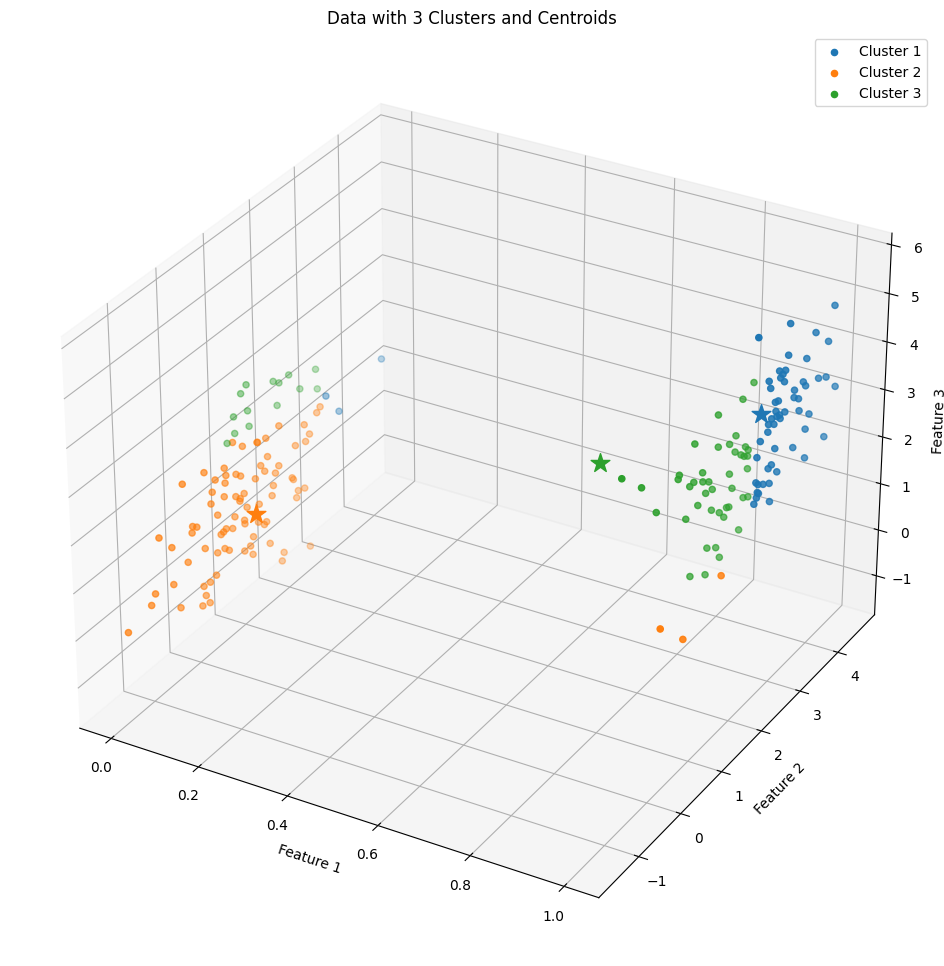

In [10]:
number_of_clusters = 3
initialization = 'k-means++'

kmeans = KMeans(n_clusters=number_of_clusters, init=initialization, random_state=42)
kmeans.fit(df_2d_3clusters)

centroids = kmeans.cluster_centers_

colors = plt.cm.tab10(range(number_of_clusters))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(number_of_clusters):
    ax.scatter(df_2d_3clusters[kmeans.labels_ == cluster_label].iloc[:, 0],
               df_2d_3clusters[kmeans.labels_ == cluster_label].iloc[:, 1],
               df_2d_3clusters[kmeans.labels_ == cluster_label].iloc[:, 2],
               label=f'Cluster {cluster_label + 1}')

for i, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], centroid[2], c=[colors[i]], marker='*', s=200)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(f'Data with {number_of_clusters} Clusters and Centroids')
ax.legend()
plt.show()


In [13]:
df_2d_4clusters = df_2d.copy()

final_kmeans = KMeans(n_clusters=4, random_state=42)
df_2d_4clusters['Cluster'] = final_kmeans.fit_predict(df_2d_4clusters.iloc[:, :-1])

df_2d_4clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01,Cluster
0,0.0,2.687848,2.366961,3
1,0.0,-0.201379,0.470430,2
2,0.0,0.608496,1.225400,1
3,0.0,-0.082282,1.137218,2
4,0.0,2.083069,2.694482,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


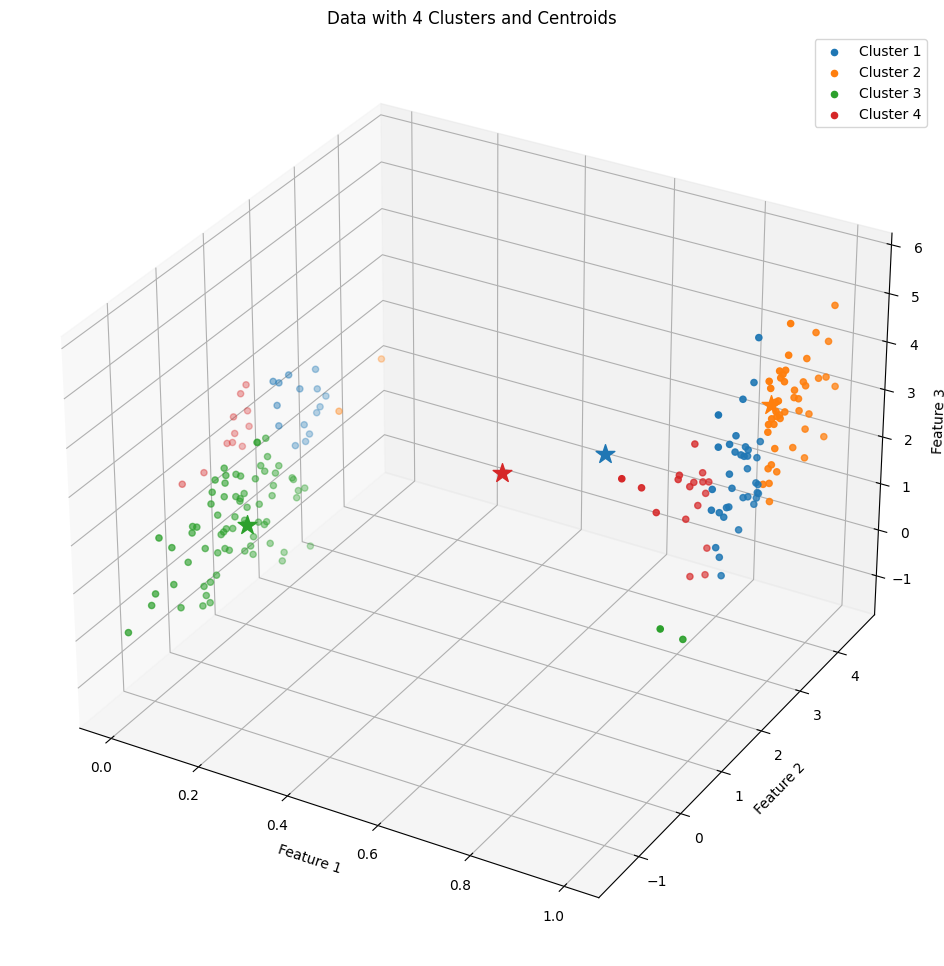

In [14]:
number_of_clusters = 4
initialization = 'k-means++'

kmeans = KMeans(n_clusters=number_of_clusters, init=initialization, random_state=42)
kmeans.fit(df_2d_4clusters)

centroids = kmeans.cluster_centers_

colors = plt.cm.tab10(range(number_of_clusters))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(number_of_clusters):
    ax.scatter(df_2d_4clusters[kmeans.labels_ == cluster_label].iloc[:, 0],
               df_2d_4clusters[kmeans.labels_ == cluster_label].iloc[:, 1],
               df_2d_4clusters[kmeans.labels_ == cluster_label].iloc[:, 2],
               label=f'Cluster {cluster_label + 1}')

for i, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], centroid[2], c=[colors[i]], marker='*', s=200)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title(f'Data with {number_of_clusters} Clusters and Centroids')
ax.legend()
plt.show()



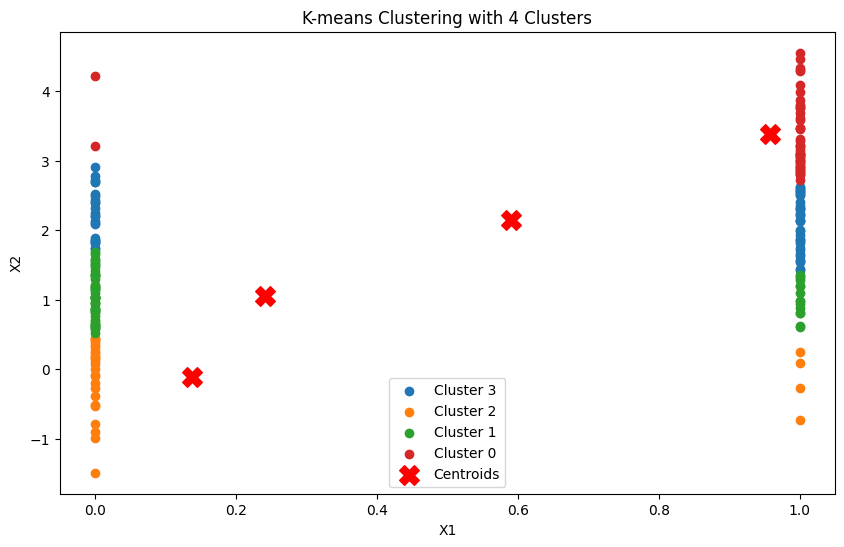

In [16]:
# для порівняння як виглядае 4 кластера на 2Д графіку
clusters = df_2d_4clusters['Cluster'].unique()

plt.figure(figsize=(10, 6))
for cluster in clusters:
    cluster_data = df_2d_4clusters[df_2d_4clusters['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

centroids = final_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering with 4 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

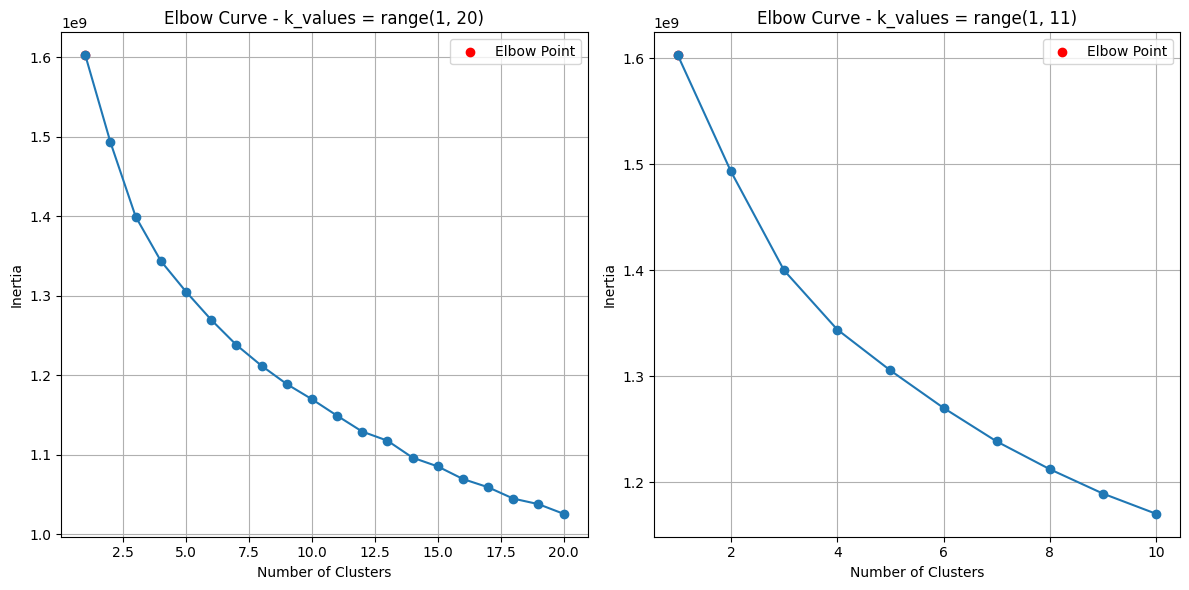

In [19]:
k_values_range1 = range(1, 21)
inertia_values_range1 = []

for k in k_values_range1:
    kmeans_range1 = KMeans(n_clusters=k, random_state=42)
    kmeans_range1.fit(df_mnist)
    inertia_values_range1.append(kmeans_range1.inertia_)

elbow_point_range1 = inertia_values_range1.index(max(inertia_values_range1)) + 1

k_values_range2 = range(1, 11)
inertia_values_range2 = []

for k in k_values_range2:
    kmeans_range2 = KMeans(n_clusters=k, random_state=42)
    kmeans_range2.fit(df_mnist)
    inertia_values_range2.append(kmeans_range2.inertia_)

elbow_point_range2 = inertia_values_range2.index(max(inertia_values_range2)) + 1

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(elbow_point_range1, inertia_values_range1[elbow_point_range1 - 1], c='red', label='Elbow Point')
plt.plot(k_values_range1, inertia_values_range1, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve - k_values = range(1, 20)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(elbow_point_range2, inertia_values_range2[elbow_point_range2 - 1], c='red', label='Elbow Point')
plt.plot(k_values_range2, inertia_values_range2, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve - k_values = range(1, 11)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Elbow Point (range(1, 21)): 2
Elbow Point (range(1, 11)): 2


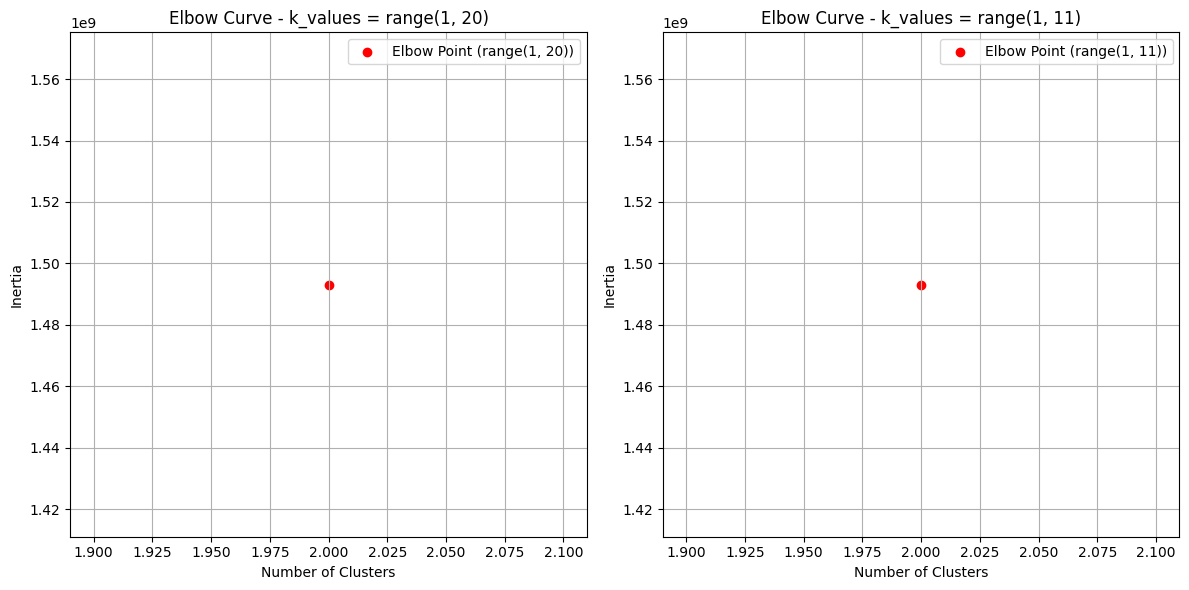

In [20]:
print("Elbow Point (range(1, 21)):", elbow_point_range1 + 1)
print("Elbow Point (range(1, 11)):", elbow_point_range2 + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(elbow_point_range1 + 1, inertia_values_range1[elbow_point_range1], c='red', label='Elbow Point (range(1, 20))')
# plt.plot(k_values_range1, inertia_values_range1, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve - k_values = range(1, 20)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(elbow_point_range2 + 1, inertia_values_range2[elbow_point_range2], c='red', label='Elbow Point (range(1, 11))')
# plt.plot(k_values_range2, inertia_values_range2, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve - k_values = range(1, 11)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-23-fd2a518ef131>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid_x, centroid_y, marker='*', s=200, c=colors[cluster_label], label=f'Centroid {cluster_label + 1}')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-23-fd2a518ef131>:29: UserWarning

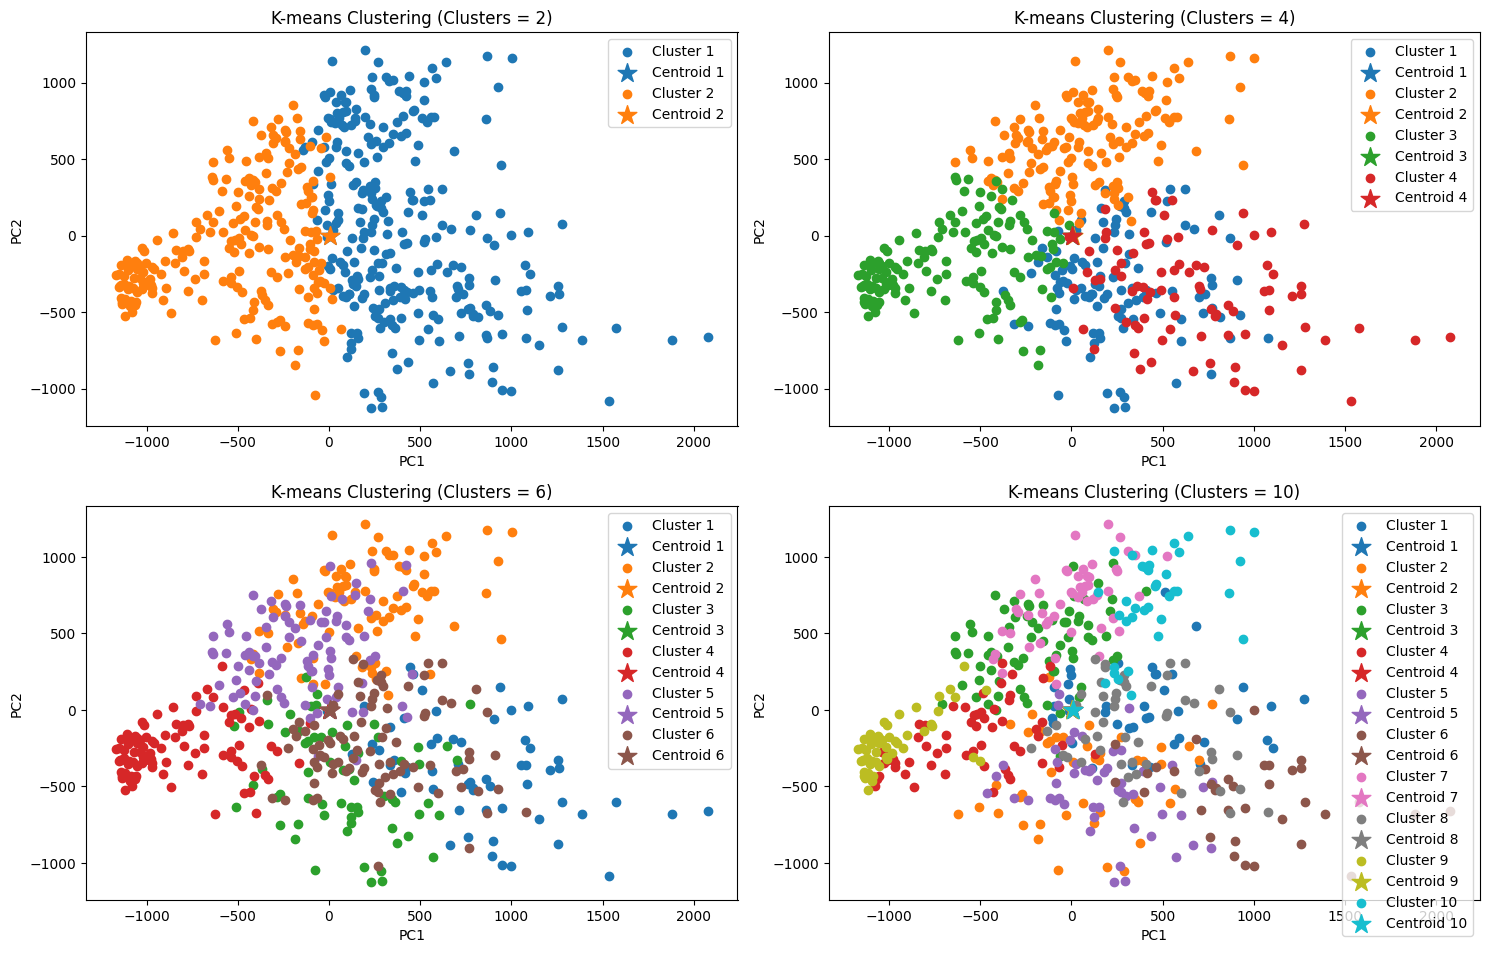

In [23]:
cluster_counts = [2, 4, 6, 10]

pca = PCA(n_components=2)
df_mnist_2d = pd.DataFrame(pca.fit_transform(df_mnist.iloc[:, :-1]), columns=['PC1', 'PC2'])


plt.figure(figsize=(15, 10))

for i, num_clusters in enumerate(cluster_counts, 1):

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df_mnist_2d[f'Cluster_{num_clusters}'] = kmeans.fit_predict(df_mnist.iloc[:, :-1])

    plt.subplot(2, 2, i)
    colors = plt.cm.tab10(range(num_clusters))

    for cluster_label in range(num_clusters):
        plt.scatter(df_mnist_2d[df_mnist_2d[f'Cluster_{num_clusters}'] == cluster_label]['PC1'],
                    df_mnist_2d[df_mnist_2d[f'Cluster_{num_clusters}'] == cluster_label]['PC2'],
                    label=f'Cluster {cluster_label + 1}', c=[colors[cluster_label]])

        centroid_x = kmeans.cluster_centers_[cluster_label, 0]
        centroid_y = kmeans.cluster_centers_[cluster_label, 1]
        plt.scatter(centroid_x, centroid_y, marker='*', s=200, c=colors[cluster_label], label=f'Centroid {cluster_label + 1}')

    plt.title(f'K-means Clustering (Clusters = {num_clusters})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-241ce77fddeb>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroid_x, centroid_y, centroid_z, marker='*', s=200, c=colors[cluster_label], label=f'Centroid {cluster_label + 1}')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-241ce77fddeb>:24: 

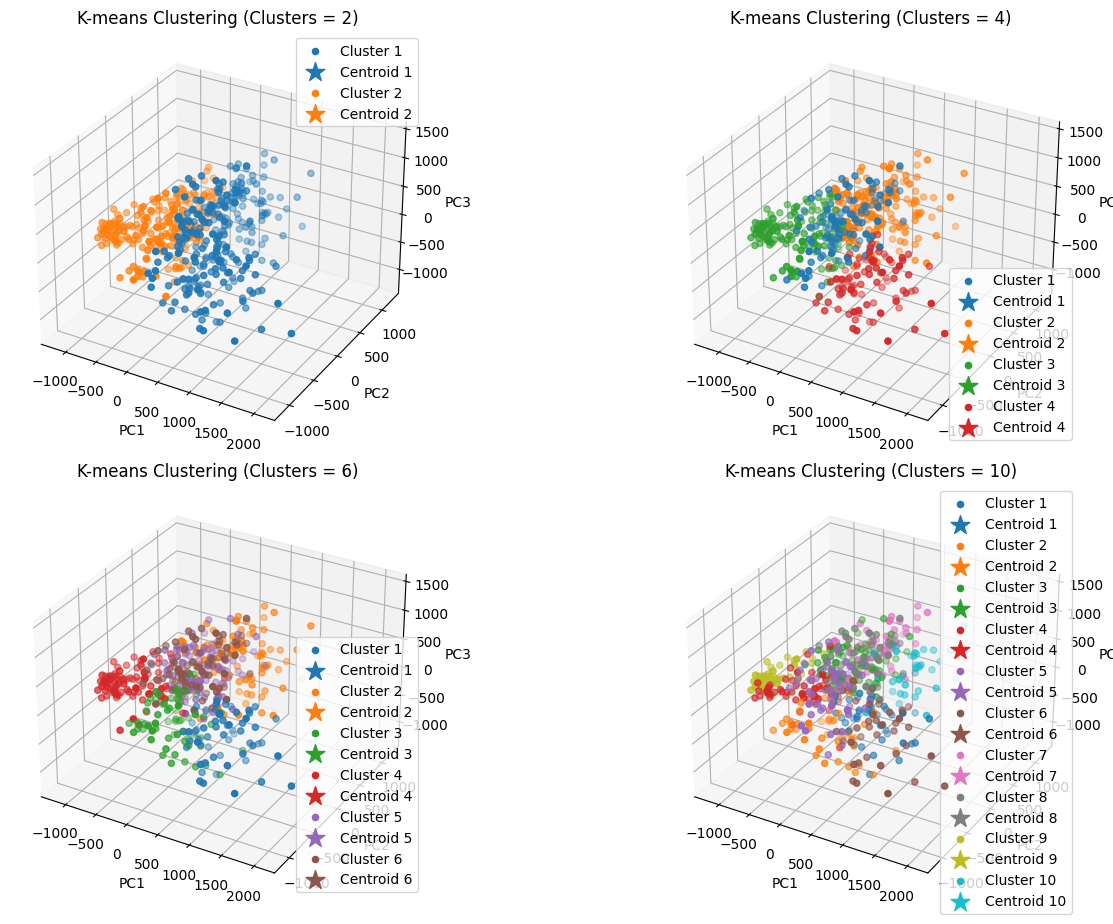

In [25]:
cluster_counts = [2, 4, 6, 10]

pca = PCA(n_components=3)
df_mnist_3d = pd.DataFrame(pca.fit_transform(df_mnist.iloc[:, :-1]), columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(15, 10))

for i, num_clusters in enumerate(cluster_counts, 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df_mnist_3d[f'Cluster_{num_clusters}'] = kmeans.fit_predict(df_mnist.iloc[:, :-1])

    ax = fig.add_subplot(2, 2, i, projection='3d')
    colors = plt.cm.tab10(range(num_clusters))

    for cluster_label in range(num_clusters):
        ax.scatter(df_mnist_3d[df_mnist_3d[f'Cluster_{num_clusters}'] == cluster_label]['PC1'],
                   df_mnist_3d[df_mnist_3d[f'Cluster_{num_clusters}'] == cluster_label]['PC2'],
                   df_mnist_3d[df_mnist_3d[f'Cluster_{num_clusters}'] == cluster_label]['PC3'],
                   label=f'Cluster {cluster_label + 1}', c=[colors[cluster_label]])

        centroid_x = kmeans.cluster_centers_[cluster_label, 0]
        centroid_y = kmeans.cluster_centers_[cluster_label, 1]
        centroid_z = kmeans.cluster_centers_[cluster_label, 2]
        ax.scatter(centroid_x, centroid_y, centroid_z, marker='*', s=200, c=colors[cluster_label], label=f'Centroid {cluster_label + 1}')

    ax.set_title(f'K-means Clustering (Clusters = {num_clusters})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()

plt.tight_layout()
plt.show()
